<a href="https://colab.research.google.com/github/Aleksandra0001/DataScience/blob/main/HW5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вторая часть.

In [79]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import leastsq, minimize_scalar

Пусть все население (N индивидов) делится на три группы: индивиды, которые восприимчивы к данной болезни, но здоровы (susceptible) — S(t); зараженные индивиды (infected) — I(t) (они больны сами и являются носителями болезни) и здоровые индивиды, обладающие иммунитетом к данной болезни (recovered) — R(t).\
**`Примем, что`** \

> **S(t)+I(t)+R(t)=N** \

Постоянные пропорциональности **α** и **β** называют коэффициентами заболеваемости и выздоровления соответственно. \

**`Примем, что:`**

1. α = 0.5
2. β = 0.3
3. N = 1 000 000
4. S(0) = 990 000
5. I(0) = 7 000
6. R(0) = 3 000
7. t_0, t_f = 0, 25


**`Необходимо методом наименьших квадратов:`** \
1. для набора данных графика функции S(t) получить уравнение вида S(t)=S0e^−αt
2. для набора данных графика функции I(t) получить уравнение вида I(t)=(I0+αS0*t)e^−αt

**`Для уравнения R(t) график функции будет R(t) = N - S(t) - I(t)`** \
1. Построить все три графика S(t), I(t) и R(t) на одной области отображения полученные методом наименьших квадратов
2. Найти время t_max при котором число инфекционных индивидов максимально. Надо с помощью метода minimize_scalar найти когда функция I(t) достигает своего максимума.

In [80]:
alpha = 0.5 
beta = 0.3
N = 1000000
S = 990000
I = 7000
R = 3000
t0, tf = 0, 25

In [95]:
t = np.linspace(t0, tf, 100)


def st(t, alp):
    return S*np.exp(-alp*t)

def diff_st(p0, y1, t):
    alp = p0
    return y1 - st(t, alp)


y1 = np.array(S * np.exp(-alpha * t))
aprx1, _ = leastsq(diff_st, (0.5, ), args=(y1, t))
y1_aprx = np.array(S * np.exp(-aprx1 * t))


In [96]:
def it(t, alp):
    return (I+alp*S*t) * np.exp(-alp*t)

def diff_it(p0, y2, t):
    alp = p0
    return y2 - it(t, alp)


y2 = np.array((I+alpha*S*t) * np.exp(-alpha*t))
aprx2, _ = leastsq(diff_it, (0.5, ), args=(y2, t))
y2_aprx = np.array((I+alpha*S*t) * np.exp(-aprx2*t))

In [97]:
y3 = np.array(N-(y1+y2))
y3_aprx = np.array(N-(y1_aprx+y2_aprx))

Найти время t_max при котором число инфекционных индивидов максимально. Надо с помощью метода minimize_scalar найти когда функция I(t) достигает своего максимума.

In [112]:
result = minimize_scalar(lambda t, alp: -it(t, alp), bracket=(0,5), args=(aprx2,))

t_max = np.round(result['x'][0],2)
infected = np.round(it(t_max, aprx2[0]),2)

print(f'Время t_max при котором число инфекционных индивидов максимально:\nt_max: {t_max}\ninfected: {infected} ')

Время t_max при котором число инфекционных индивидов максимально:
t_max: 1.99
infected: 366784.14 


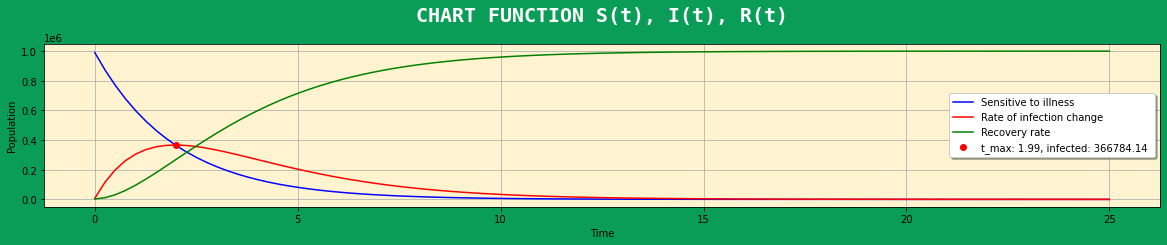

In [117]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)


fig.set(facecolor = '#0a9d58')
fig.set_figwidth(20)
ax.set(facecolor = '#fff4cf')

ax.set_title('CHART FUNCTION S(t), I(t), R(t)', color='white',weight='bold', size=20, family='monospace',  x=0.5, y=1.1)
ax.set_xlabel('Time')
ax.set_ylabel('Population')

plt.plot(t, y1_aprx, 'b', label='Sensitive to illness')

plt.plot(t, y2_aprx,'r', label='Rate of infection change')

plt.plot(t, y3_aprx,'g', label='Recovery rate')

plt.plot(t_max, it(t_max, aprx2[0]),'ro',label=f't_max: {t_max}, infected: {infected} ')

plt.legend(shadow=True)
ax.grid()
plt.show()